In [2]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.datasets import make_blobs


Text(0, 0.5, 'Feature 1')

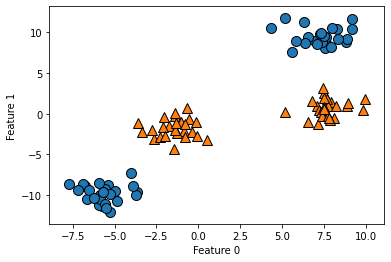

In [4]:
X, y = make_blobs(centers=4, random_state=8)
y =  y % 2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

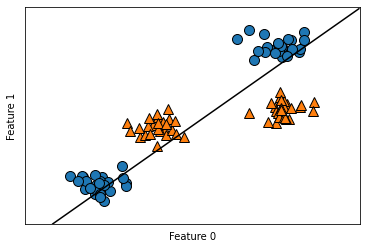

In [5]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/var/folders/v_/vqrfph2112g8639mj92n9dqw0000gn/T/ipykernel_14139/2706519359.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev = -152, azim = -26)


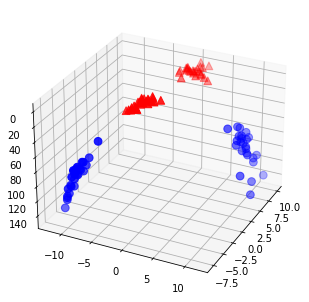

In [11]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

#2番目の特徴量の2乗を追加
X_new = np.hstack((X, X[:,1:]**2))


#3Dで可視化
ax = Axes3D(figure, elev = -152, azim = -26)
# y == 0 の点をプロットしてから y == 1の点をプロット
mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c = 'b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c = 'r',marker='^',cmap=mglearn.cm2,s=60)
